# Nus Investment Club 
## Quantitative Portfolio Department Year Project
## Group 2

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project we will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the Google.

 **Step 1:** get the data of desired firm from [yfinance](https://sg.finance.yahoo.com).

In [52]:
import yfinance as yf
data = yf.download('GOOGL','2006-01-01','2020-12-31') # from January 1, 2006 to December 30, 2020
replica = data.copy()

[*********************100%***********************]  1 of 1 completed


**Step 2:** Write the data to a csv file.

In [2]:
data.to_csv('google.csv',index = False)

## Preprocess the data


**Step 1 :** Get the data from csv file.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


         Open        High         Low       Close   Adj Close    Volume
0  211.471466  218.053055  209.319321  217.832840  217.832840  26216158
1  222.172165  224.704712  220.095093  222.842850  222.842850  30542227
2  223.223221  226.001007  220.970978  225.845840  225.845840  21594983
3  228.663666  235.485489  226.846848  233.063065  233.063065  35478286
4  233.438431  236.936935  230.700699  233.683685  233.683685  25558216


Open   --- mean : 595.1854611670892   	 Std:  404.659344519683   	 Max:  1820.5400390625   	 Min:  131.38638305664062
High   --- mean : 600.8108673338227   	 Std:  408.7066359298637   	 Max:  1843.8299560546875   	 Min:  134.81982421875
Low    --- mean : 589.2461429843523   	 Std:  400.8042003921636   	 Max:  1817.0   	 Min:  123.77377319335938
Close  --- mean : 595.1791107662782   	 Std:  404.9480276583226   	 Max:  1824.969970703125   	 Min:  128.84884643554688
Volume --- mean : 5555460.540397351   	 Std:  5995355.040941806   	 Max:  82151167   	 Min:  46560

**Step 2 :** Add item field

In [4]:
import preprocess_data as ppd
stocks = ppd.add_item_field(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

         Open        High         Low       Close   Adj Close    Volume  Item
0  211.471466  218.053055  209.319321  217.832840  217.832840  26216158     0
1  222.172165  224.704712  220.095093  222.842850  222.842850  30542227     1
2  223.223221  226.001007  220.970978  225.845840  225.845840  21594983     2
3  228.663666  235.485489  226.846848  233.063065  233.063065  35478286     3
4  233.438431  236.936935  230.700699  233.683685  233.683685  25558216     4
---
             Open         High          Low        Close    Adj Close  \
3770  1723.930054  1744.109985  1721.199951  1728.229980  1728.229980   
3771  1729.000000  1742.410034  1724.349976  1734.160034  1734.160034   
3772  1744.910034  1787.000000  1741.819946  1773.959961  1773.959961   
3773  1787.229980  1788.469971  1755.109985  1757.760010  1757.760010   
3774  1765.000000  1767.760010  1728.000000  1736.250000  1736.250000   

       Volume  Item  
3770  1148700  3770  
3771   465600  3771  
3772  1382500  3772  
3

**Step 3:** Visualise raw data.

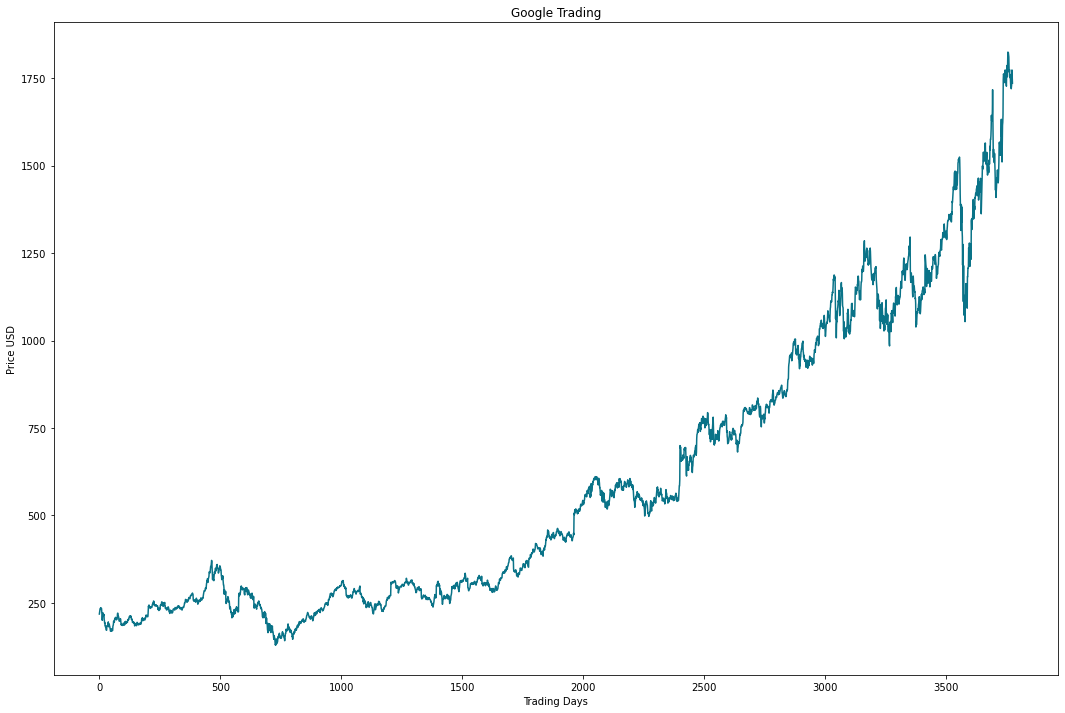

In [5]:
import visualize

visualize.plot_basic(stocks)

**Step 4 :** Add more features

In [6]:
import technical_indicators as ti

In [7]:
stocks = ti.calTechnicalIndicator(stocks)

3750


In [8]:
# Check for highly-correlated features
stocks.columns
corrMatrix = stocks.corr()
corrMatrix

,Open,High,Low,Close,Adj Close,Volume,Item,PCT_CHANGE,MACD,SMA,EMA,TR,ATR,MA,BB_UP,BB_DOWN,BB_RANGE,RSI,ADX
Open,1.000000,0.999880,0.999842,0.999728,0.999728,-0.561963,0.925715,0.002846,0.999389,0.031217,0.027153,0.699327,0.816447,0.999006,0.998444,0.998695,0.572346,0.115108,-0.143320
High,0.999880,1.000000,0.999801,0.999857,0.999857,-0.559797,0.925297,0.008635,0.999443,0.032407,0.030379,0.703344,0.819507,0.999061,0.998600,0.998646,0.575207,0.114949,-0.142594
Low,0.999842,0.999801,1.000000,0.999876,0.999876,-0.564733,0.926000,0.010348,0.999209,0.036215,0.034155,0.694653,0.813034,0.998773,0.998089,0.998589,0.568794,0.120622,-0.144861
Close,0.999728,0.999857,0.999876,1.000000,1.000000,-0.562394,0.925695,0.016816,0.999286,0.036992,0.037200,0.699271,0.816367,0.998862,0.998291,0.998560,0.572032,0.119989,-0.143706
Adj Close,0.999728,0.999857,0.999876,1.000000,1.000000,-0.562394,0.925695,0.016816,0.999286,0.036992,0.037200,0.699271,0.816367,0.998862,0.998291,0.998560,0.572032,0.119989,-0.143706
Volume,-0.561963,-0.559797,-0.564733,-0.562394,-0.562394,1.000000,-0.704181,0.004647,-0.561755,-0.038472,-0.032934,-0.256763,-0.346890,-0.561375,-0.557066,-0.565364,-0.209264,-0.099498,0.237244
Item,0.925715,0.925297,0.926000,0.925695,0.925695,-0.704181,1.000000,0.004429,0.926671,0.011231,0.011215,0.623710,0.728596,0.926477,0.924924,0.927265,0.501760,0.063611,-0.208512
PCT_CHANGE,0.002846,0.008635,0.010348,0.016816,0.016816,0.004647,0.004429,1.000000,-0.001266,0.438238,0.745829,-0.013942,0.000892,-0.003286,-0.004043,-0.002493,-0.023242,0.314812,-0.020469
MACD,0.999389,0.999443,0.999209,0.999286,0.999286,-0.561755,0.926671,-0.001266,1.000000,0.010603,0.008894,0.706928,0.819404,0.999921,0.999486,0.999476,0.576475,0.096384,-0.142130
SMA,0.031217,0.032407,0.036215,0.036992,0.036992,-0.038472,0.011231,0.438238,0.010603,1.000000,0.860065,-0.102211,-0.016602,0.002648,0.001653,0.003683,-0.026441,0.638010,-0.029428


In [9]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
to_drop = [column for column in to_drop if (column != 'Close')]
to_drop

['Adj Close', 'MACD', 'MA', 'BB_UP', 'BB_DOWN']

In [10]:
stocks.drop(columns=to_drop, inplace=True)
to_keep = stocks.columns

**Step 5:** Log the normalised data for future resuablilty

In [11]:
stocks.to_csv('google_preprocessed.csv',index= False)

## Bench Mark Model

In this section we will check our bench mark model using a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [12]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Open,High,Low,Close,Volume,Item,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,171.341339,175.220215,170.940948,174.269272,20794385,52,0.024721,0.006793,0.005651,3.428436,6.990739,18.995925,45.519984,13.487861
1,175.180176,176.006012,169.709717,170.130127,19642538,53,-0.023751,-0.006324,-0.004150,4.279266,6.991489,18.874057,41.940157,13.455205
2,170.045044,172.222229,168.918915,170.280273,15176808,54,0.000883,-0.002354,-0.002472,6.296295,7.095342,17.545950,42.117982,13.537776
3,171.346344,173.048050,170.270264,171.116119,14854531,55,0.004909,0.001954,-0.000012,3.303314,7.133131,15.580164,43.161630,13.450484
4,184.494492,185.230225,181.436432,183.083084,30330839,56,0.069935,0.015339,0.023304,2.777786,6.875374,12.881033,55.525719,13.546528


**Step 2:** Split data into train and test pair

In [13]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2551, 1)
y_train (2551, 1)
x_test (1172, 1)
y_test (1172, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [14]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [15]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

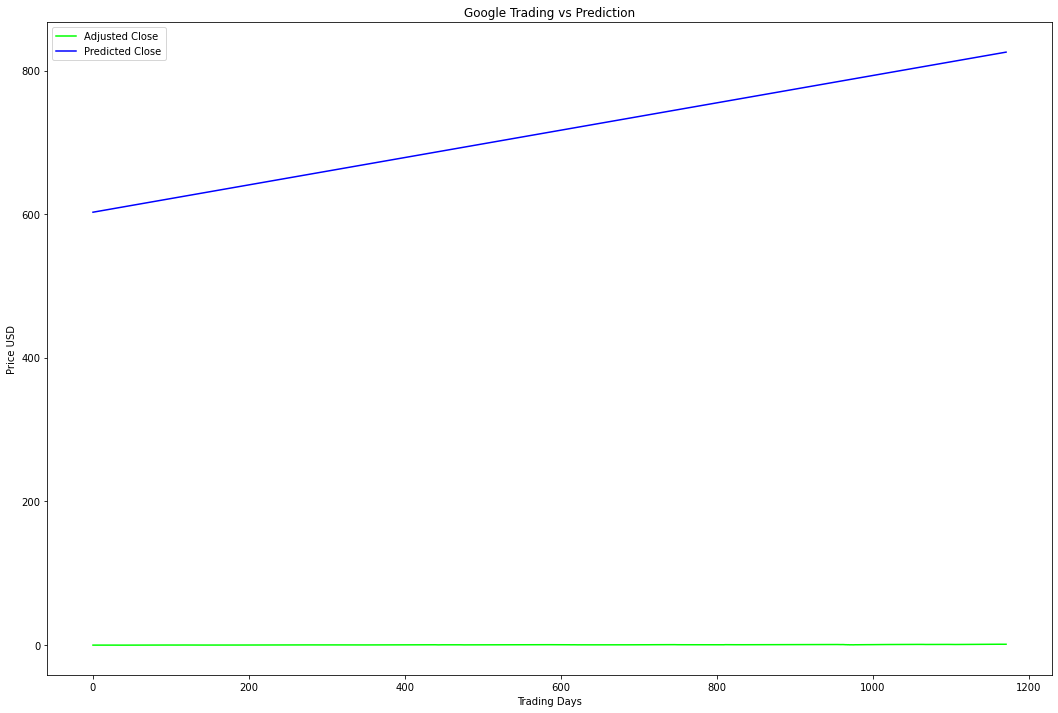

In [16]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [17]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.2324 MSE (0.4821 RMSE)
Test Score: 513982.72601736 MSE (716.92588600 RMSE)


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [18]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,High,Low,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,171.341339,175.220215,170.940948,174.269272,20794385,0.024721,0.006793,0.005651,3.428436,6.990739,18.995925,45.519984,13.487861
1,175.180176,176.006012,169.709717,170.130127,19642538,-0.023751,-0.006324,-0.004150,4.279266,6.991489,18.874057,41.940157,13.455205
2,170.045044,172.222229,168.918915,170.280273,15176808,0.000883,-0.002354,-0.002472,6.296295,7.095342,17.545950,42.117982,13.537776
3,171.346344,173.048050,170.270264,171.116119,14854531,0.004909,0.001954,-0.000012,3.303314,7.133131,15.580164,43.161630,13.450484
4,184.494492,185.230225,181.436432,183.083084,30330839,0.069935,0.015339,0.023304,2.777786,6.875374,12.881033,55.525719,13.546528


**Step 2 :** Split train and test data sets 

In [19]:
X_train, X_test,y_train, y_test, y_test_close_base, y_test_close_actual = sd.train_test_split_lstm(stocks_data) 

## change from 5 to 1
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

X_train[:2], y_train[:2], X_test[:2], y_test[:2]

x_train (3221, 13)
y_train (3221,)
x_test (500, 13)
y_test (500,)


(array([[ 1.71341339e+02,  1.75220215e+02,  1.70940948e+02,
          1.74269272e+02,  2.07943850e+07,  2.47211760e-02,
          6.79317012e-03,  5.65098223e-03,  3.42843628e+00,
          6.99073868e+00,  1.89959249e+01,  4.55199840e+01,
          1.34878610e+01],
        [ 1.75180176e+02,  1.76006012e+02,  1.69709717e+02,
          1.70130127e+02,  1.96425380e+07, -2.37514328e-02,
         -6.32357405e-03, -4.14982278e-03,  4.27926636e+00,
          6.99148865e+00,  1.88740571e+01,  4.19401565e+01,
          1.34552046e+01]]),
 array([-0.02375143,  0.00088254]),
 array([[ 1.08096997e+03,  1.08269995e+03,  1.06264001e+03,
          1.07592004e+03,  2.37230000e+06, -1.99421415e-03,
          5.85242718e-03,  8.10262911e-03,  4.31400146e+01,
          3.66829987e+01,  1.77012569e+01,  5.47145870e+01,
          1.32792705e+01],
        [ 1.08600000e+03,  1.09334998e+03,  1.06834998e+03,
          1.08537000e+03,  1.77070000e+06,  8.78313516e-03,
          7.93773016e-03,  8.32946446e-03

**Step 3 :** Normalise the data and Unroll train and test data for lstm model

In [20]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
sc_X = MinMaxScaler()
sc_X.fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = MinMaxScaler()
y_train = np.squeeze(sc_Y.fit_transform(y_train.reshape(-1, 1)))
y_test = np.squeeze(sc_Y.transform(y_test.reshape(-1, 1)))

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

In [22]:
unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]
y_test_close_base = y_test_close_base[-X_test.shape[0]:]
y_test_close_actual = y_test_close_actual[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print("y_test_close_base", y_test_close_base.shape)
print("y_test_close_actual", y_test_close_actual.shape)


x_train (3171, 50, 13)
y_train (3171,)
x_test (450, 50, 13)
y_test (450,)
y_test_close_base (450,)
y_test_close_actual (450,)


**Step 4 :** Build a basic Long-Short Term Memory model

In [23]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0070340633392333984


**Step 5:** Train the model

In [24]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

95/95 [==============================] - 6s 45ms/step - loss: 0.0219 - val_loss: 0.0040


**Step 6:** make prediction using test data

In [25]:
predictions = model.predict(X_test)

**Step 7:** Plot the results

In [26]:
import matplotlib.pyplot as plt

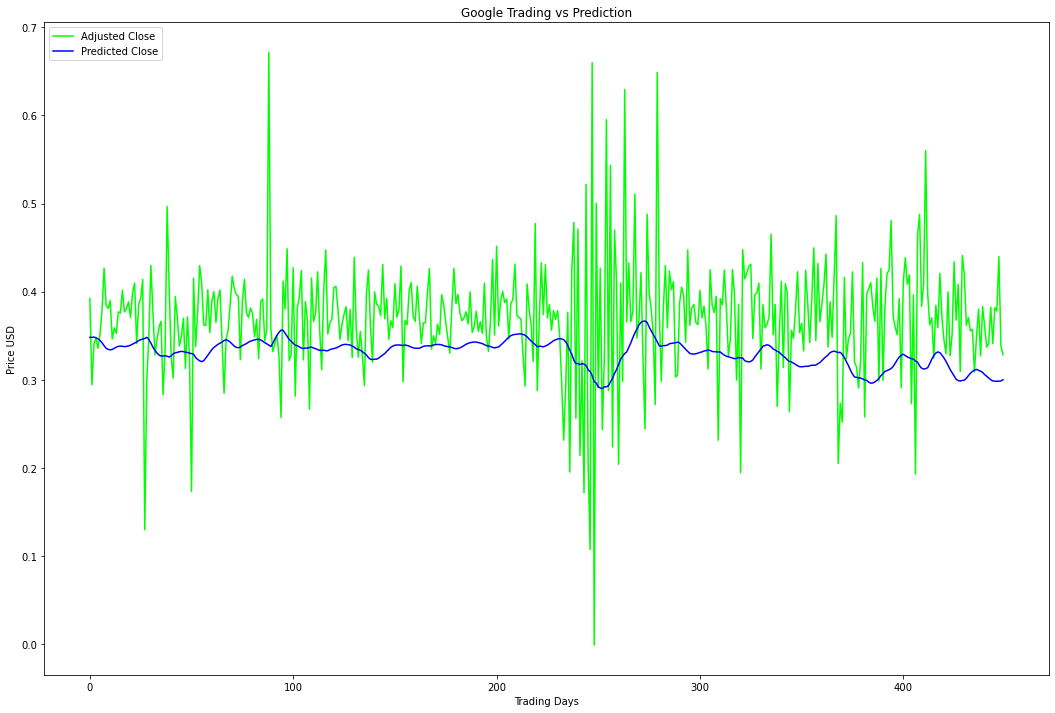

In [27]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 8:** Recover the close price

In [28]:
y_test.size, predictions.size

(450, 450)

In [29]:
predictions = sc_Y.inverse_transform(predictions)
flatten_prediction = (predictions + 1).flatten()

In [30]:
flatten_prediction.size, y_test_close_base.size

(450, 450)

In [31]:
predicted_close = np.multiply(flatten_prediction,  y_test_close_base)

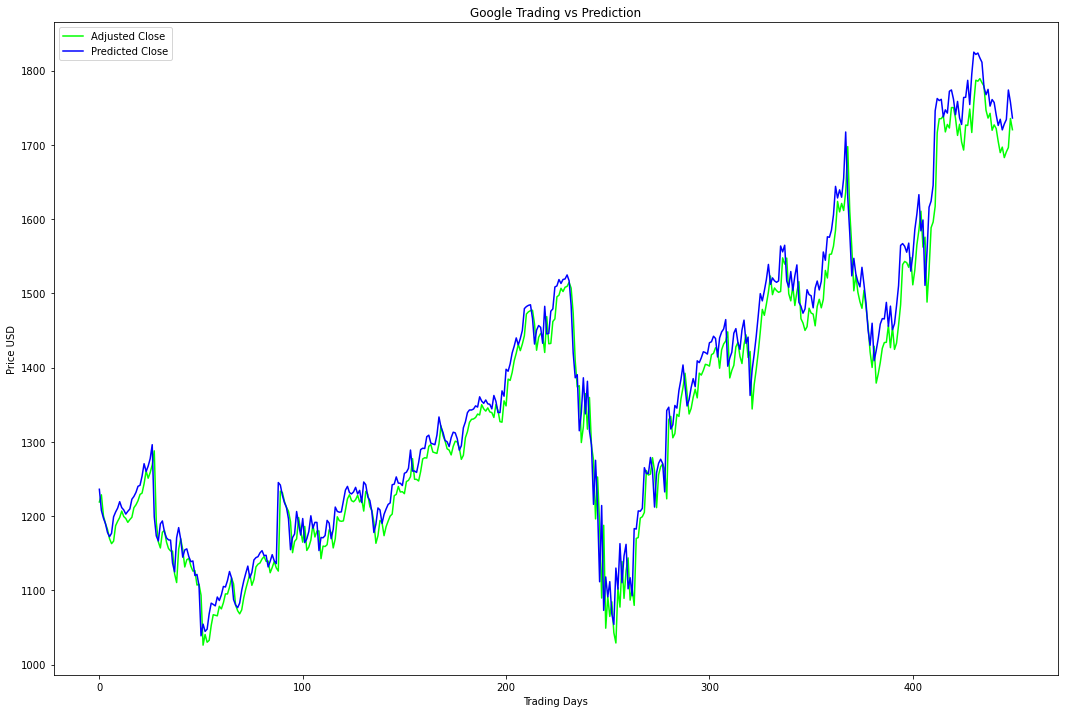

In [32]:
vs.plot_lstm_prediction(predicted_close, y_test_close_actual)

**Step 9:** Get the test score.

In [34]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00359632 MSE (0.05996936 RMSE)
Test Score: 0.00607104 MSE (0.07791686 RMSE)


### Improved LSTM Model

**Step 1:** Build an improved LSTM model

In [35]:
# Set up hyperparameters
batch_size = 100
epochs = 100

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.004084110260009766


**Step 2:** Train improved LSTM model

In [36]:
history = model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.15
         )

Epoch 1/100
27/27 - 5s - loss: 0.0124 - val_loss: 0.0029
Epoch 2/100
27/27 - 2s - loss: 0.0051 - val_loss: 0.0025
Epoch 3/100
27/27 - 2s - loss: 0.0045 - val_loss: 0.0024
Epoch 4/100
27/27 - 2s - loss: 0.0043 - val_loss: 0.0024
Epoch 5/100
27/27 - 2s - loss: 0.0043 - val_loss: 0.0025
Epoch 6/100
27/27 - 2s - loss: 0.0043 - val_loss: 0.0023
Epoch 7/100
27/27 - 2s - loss: 0.0042 - val_loss: 0.0023
Epoch 8/100
27/27 - 2s - loss: 0.0042 - val_loss: 0.0022
Epoch 9/100
27/27 - 2s - loss: 0.0041 - val_loss: 0.0023
Epoch 10/100
27/27 - 3s - loss: 0.0039 - val_loss: 0.0022
Epoch 11/100
27/27 - 3s - loss: 0.0039 - val_loss: 0.0022
Epoch 12/100
27/27 - 3s - loss: 0.0041 - val_loss: 0.0023
Epoch 13/100
27/27 - 2s - loss: 0.0040 - val_loss: 0.0023
Epoch 14/100
27/27 - 2s - loss: 0.0041 - val_loss: 0.0023
Epoch 15/100
27/27 - 3s - loss: 0.0039 - val_loss: 0.0023
Epoch 16/100
27/27 - 2s - loss: 0.0039 - val_loss: 0.0024
Epoch 17/100
27/27 - 2s - loss: 0.0039 - val_loss: 0.0022
Epoch 18/100
27/27 - 2s

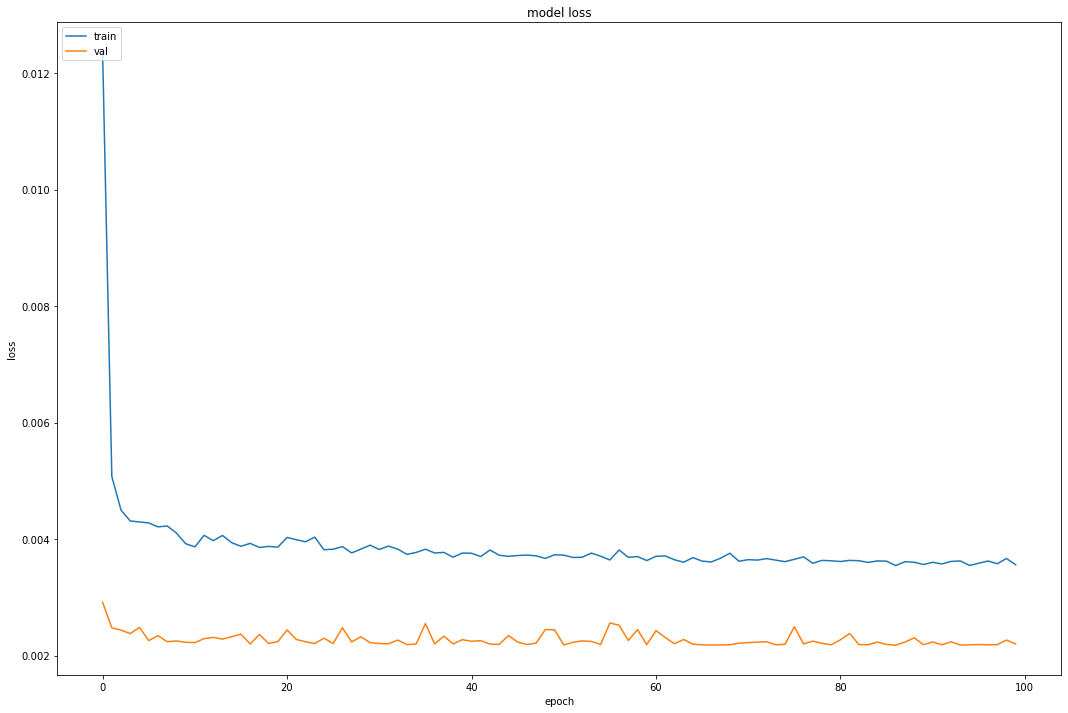

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Step 3:** Make prediction on improved LSTM model

In [38]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

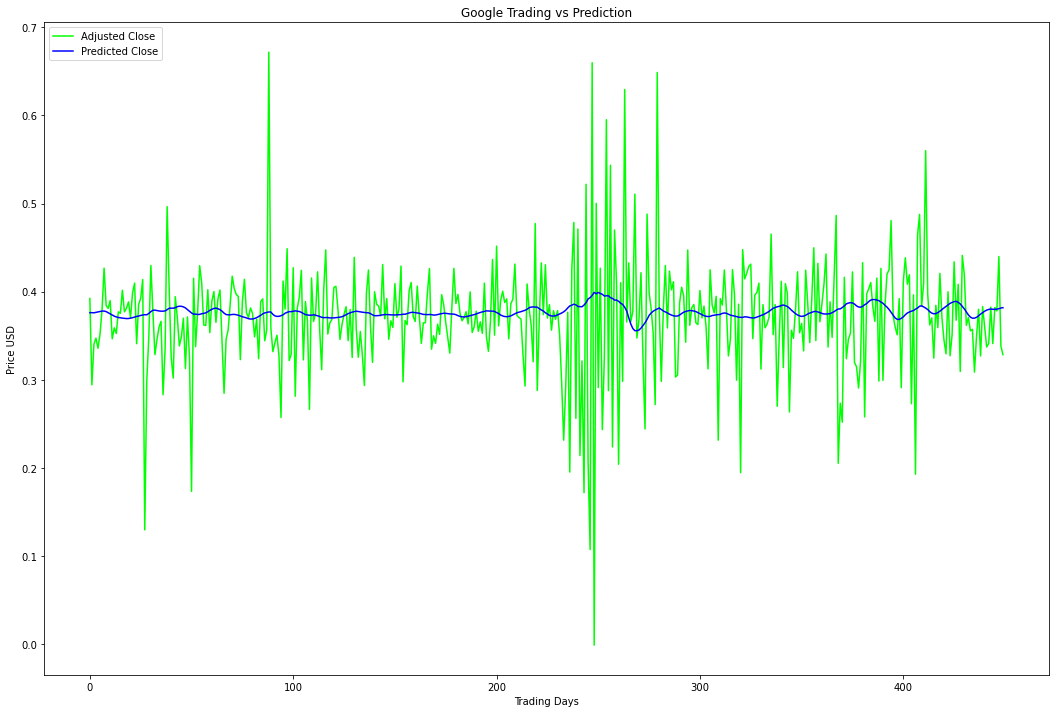

In [39]:
vs.plot_lstm_prediction(y_test,predictions)

In [40]:
predictions = sc_Y.inverse_transform(predictions)
flatten_prediction = (predictions + 1).flatten()
predicted_close = np.multiply(flatten_prediction,  y_test_close_base)

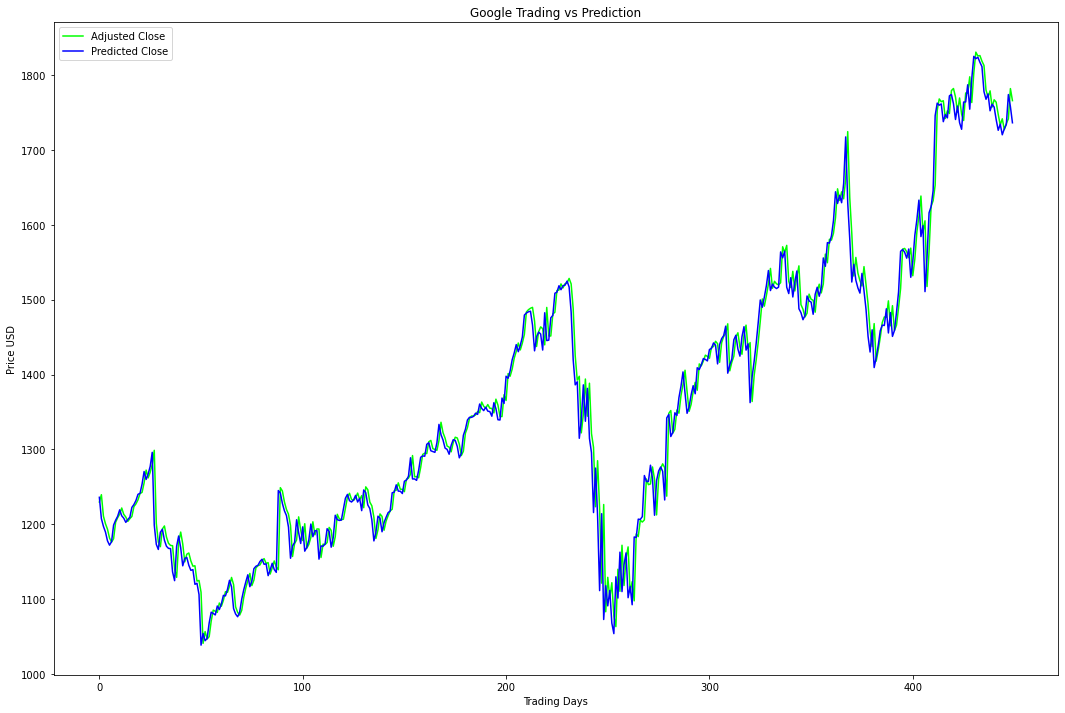

In [41]:
vs.plot_lstm_prediction(predicted_close, y_test_close_actual)

**Step 5:** Get the test score

In [42]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00325131 MSE (0.05702028 RMSE)
Test Score: 0.00439661 MSE (0.06630692 RMSE)


In [43]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 7.457180 - RMSE * Adjusted Close Range


**Step 6:** Save the model

In [44]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


**Step 7:** Save the test data for profit calculation

In [45]:
size = predicted_close.size
test = replica.iloc[-size:,:]
test['Predicted_close'] = predicted_close

450


<ipython-input-45-e5f2b18bf283>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_close'] = predicted_close


In [46]:
test.to_csv("google_test.csv")

# Checking Robustness of the model

In this section we will check robustness of our LSTM model. We have used new unseen datasets for this from January 1, 2021 to May 31,2021. we have downloaded the data sets from google finance website to check for robustness of the model.

[*********************100%***********************]  1 of 1 completed


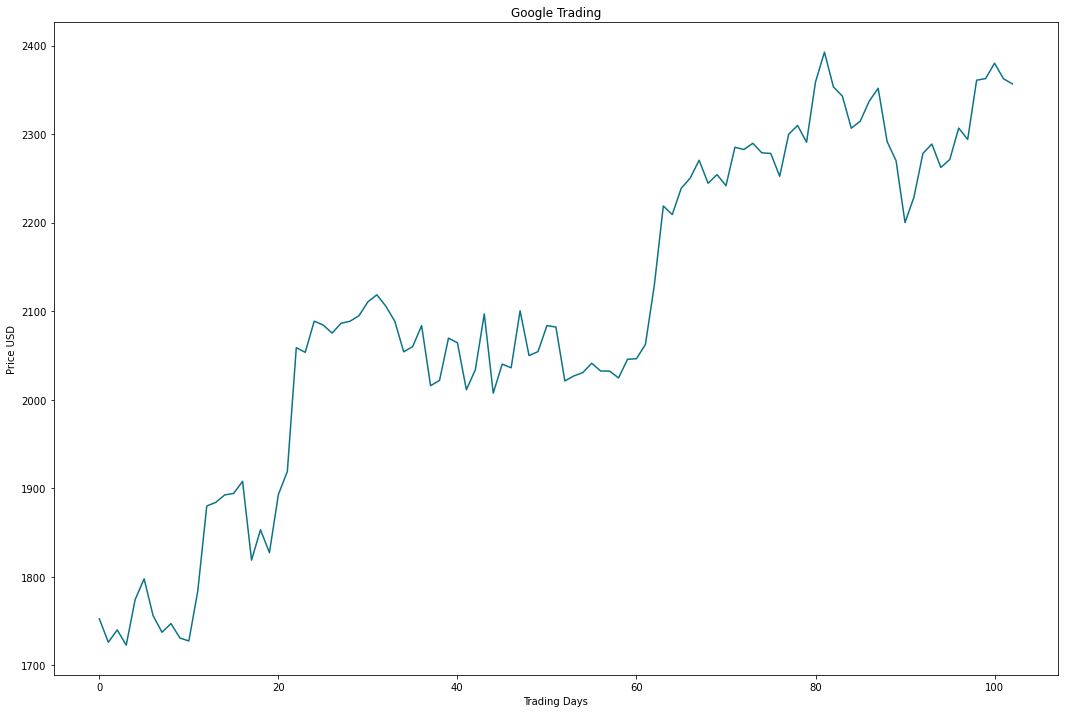

In [47]:
import preprocess_data as ppd

new_data = yf.download('GOOGL','2021-01-01','2021-05-31') # from January 1, 2021 to May 31, 2021
new_data = ppd.add_item_field(new_data)

visualize.plot_basic(new_data)

In [48]:
stocks = ppd.add_item_field(new_data)

stocks = ti.calTechnicalIndicator(stocks)

stocks = stocks[to_keep]

stocks = stocks.drop(['Item'], axis = 1)

#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['PCT_CHANGE'].values
base_price = stocks[:]['Close'].values[:-1]
aim_price = stocks[:]['Close'].values[1:]

X = sc_X.fit_transform(X)

Y = np.squeeze(sc_Y.fit_transform(Y.reshape(-1, 1)))

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]
print(X.shape)
print(Y.shape)
print(base_price.shape)
print(aim_price.shape)

78
                   Open         High          Low        Close   Volume  \
Date                                                                      
2021-03-18  2048.179932  2068.750000  2019.180054  2021.339966  1585000   
2021-03-19  2029.729980  2037.040039  2002.930054  2026.959961  2303600   
2021-03-22  2027.630005  2048.340088  2014.000000  2030.689941  1676800   
2021-03-23  2039.949951  2064.110107  2028.000000  2041.329956  1425500   
2021-03-24  2051.760010  2067.600098  2029.000000  2032.530029  1260900   

            PCT_CHANGE       SMA       EMA         TR        ATR   BB_RANGE  \
Date                                                                          
2021-03-18   -0.029238 -0.007520 -0.007830  54.880005  54.804504  22.319684   
2021-03-19    0.002780 -0.002152 -0.004293  49.569946  55.850006  22.249038   
2021-03-22    0.001840 -0.002217 -0.002249  34.109985  55.797998  22.019586   
2021-03-23    0.005240 -0.004036  0.000247  34.340088  55.898499  20.576332 

(array([2021.33996582, 2026.95996094, 2030.68994141, 2041.32995605,
        2032.5300293 , 2032.45996094, 2024.72998047, 2045.79003906,
        2046.4699707 , 2062.52001953, 2129.7800293 , 2218.95996094,
        2209.26000977, 2239.0300293 , 2250.42993164, 2270.66992188,
        2244.62011719, 2254.42993164, 2241.90991211, 2285.25      ,
        2282.75      , 2289.76000977, 2279.01000977, 2278.35009766,
        2252.52001953, 2299.92993164, 2309.92993164, 2290.97998047,
        2359.04003906, 2392.76000977, 2353.5       , 2343.08007812,
        2306.83007812, 2314.77001953, 2337.35009766, 2351.92993164,
        2291.75      , 2270.06005859, 2200.25      , 2229.04003906,
        2278.37988281, 2288.91992188, 2262.4699707 , 2271.5       ,
        2306.94995117, 2294.12988281, 2361.04003906, 2362.87011719,
        2380.31005859, 2362.67993164]),
 array([2026.95996094, 2030.68994141, 2041.32995605, 2032.5300293 ,
        2032.45996094, 2024.72998047, 2045.79003906, 2046.4699707 ,
        

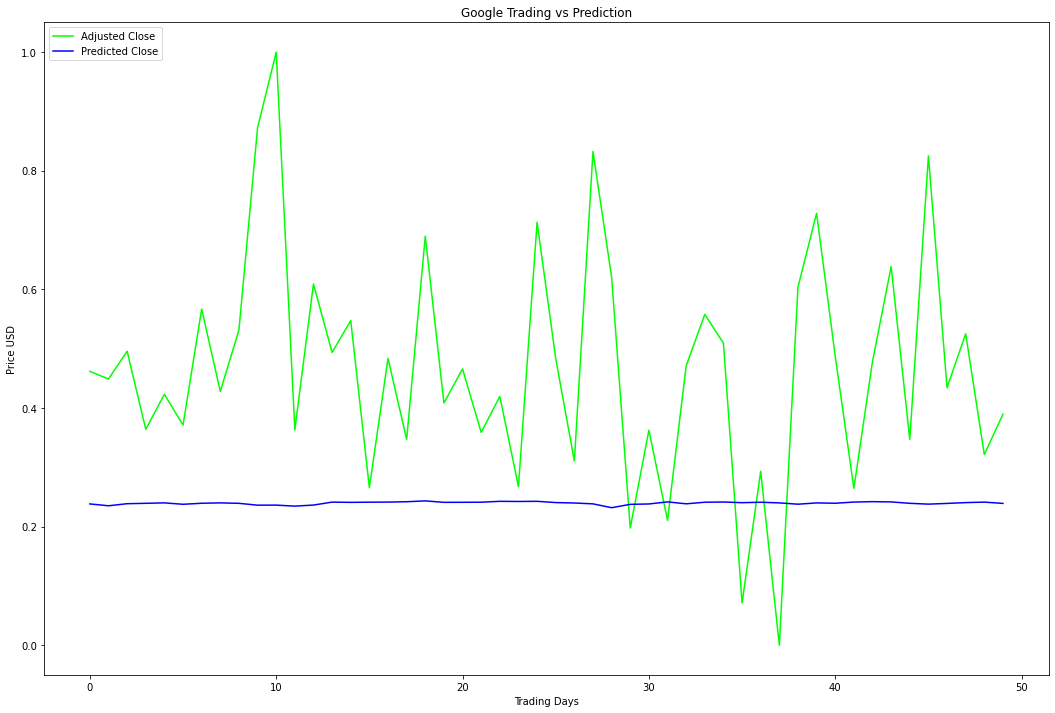

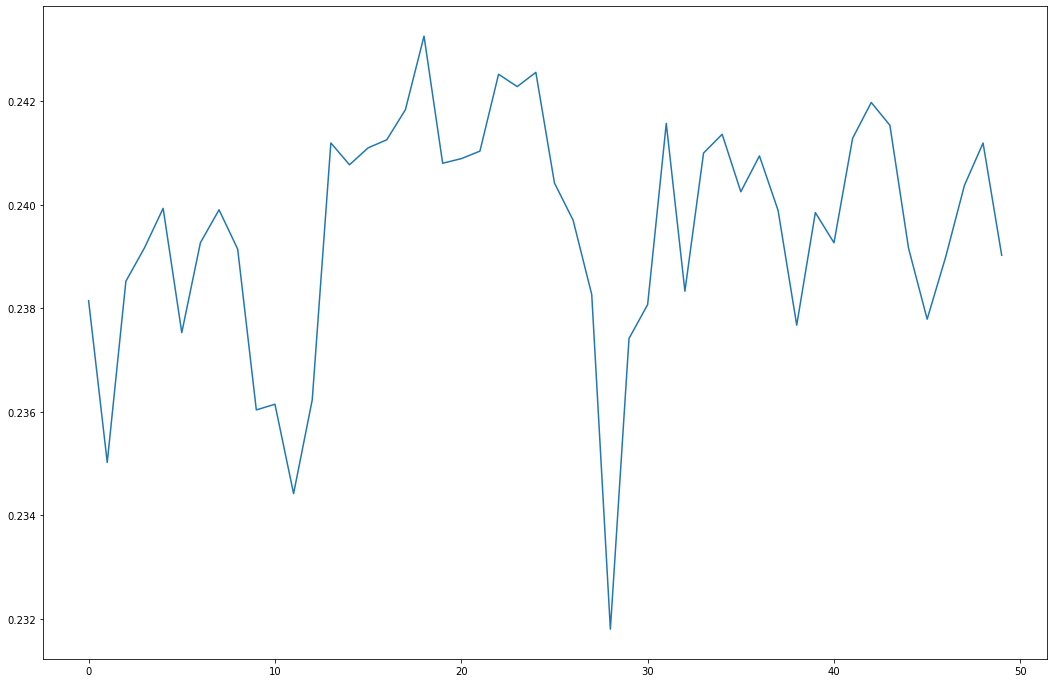

In [49]:
# Generate predictions 
predictions = model.predict(X)
vs.plot_lstm_prediction(Y, predictions)

In [50]:
# Calculate predicted price
predictions = sc_Y.inverse_transform(predictions)
flatten_prediction = (predictions + 1).flatten()
predicted_close = np.multiply(flatten_prediction, base_price)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

[[-0.01345688]
 [-0.01368391]
 [-0.01342958]
 [-0.01338262]
 [-0.0133272 ]]
[1994.13903435 1999.22321284 2003.41862408 2014.0116259  2005.44213302]
Test Score: 0.0885 MSE (0.2976 RMSE)


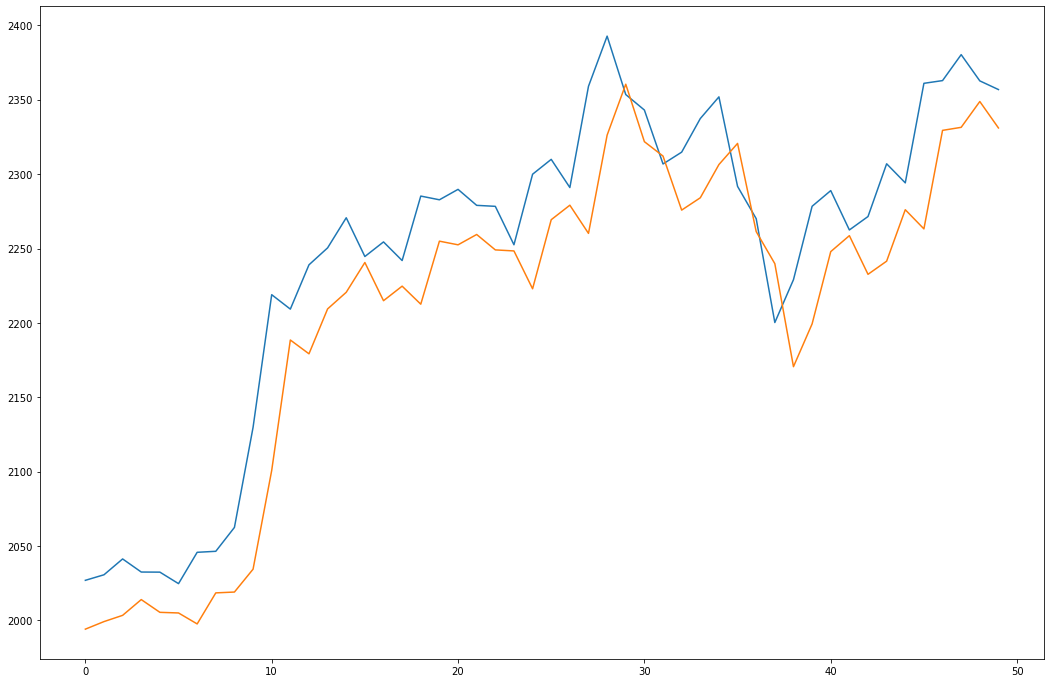

In [51]:
plt.plot(aim_price)
plt.plot(predicted_close)